In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image, ImageOps
import os

In [15]:
# two image examples
im_dog = './1k-compressed/_-QQuvAwQ-0.jpg'  # portrait
im_cat = './1k-compressed/_M7BGSi_aRQ.jpg'  # landscape

format is JPEG
mode is RGB
image size width x height: 767 x 512


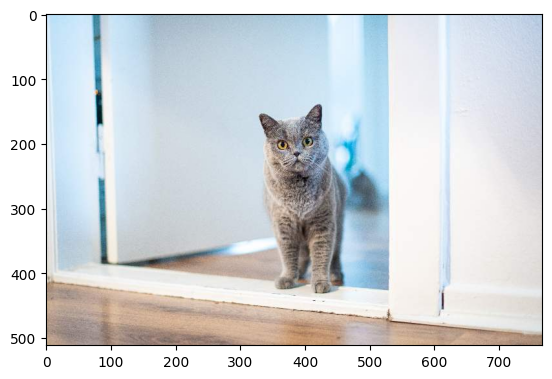

In [16]:
# PIL basic properties
# Pillow coordinate system starts with (0,0) in the upper left corner (the centre of a pixel addressed as (0, 0) actually lies at (0.5, 0.5))
# Rectangles are represented as 4-tuples, with the upper left corner given first followed by the lower right corner. (0, 0, 800, 600) 

img = Image.open(im_cat)
print(f'format is {img.format}')
print(f'mode is {img.mode}')
w, h = img.size  # width and height
print(f'image size width x height: {w} x {h}')
plt.imshow(img)

(-0.5, 766.5, 511.5, -0.5)

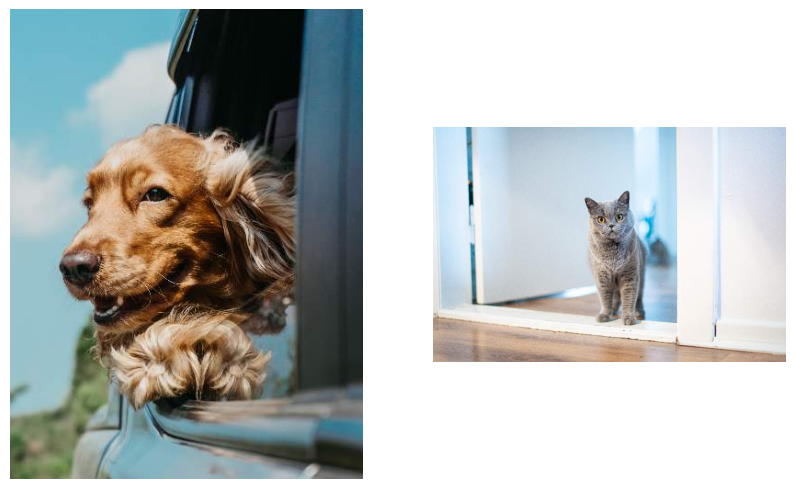

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 20))
plt.axis('off')
ax[0].imshow(Image.open(im_dog))
ax[0].axis('off')
ax[1].imshow(Image.open(im_cat))
ax[1].axis('off')

(-0.5, 766.5, 511.5, -0.5)

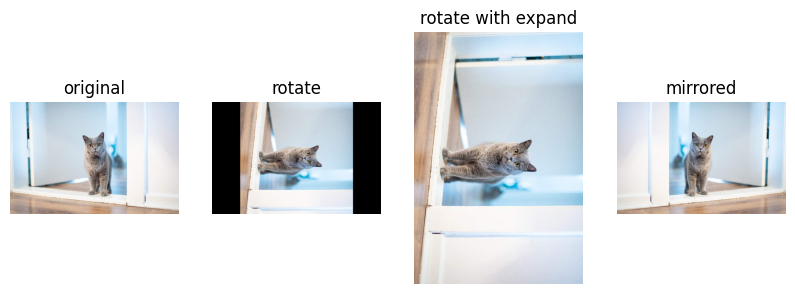

In [18]:
img = Image.open(im_cat)

# rotation - 90 degree clockwise
img_rotated = img.rotate(-90)

# rotation - 90 degree clockwise and expand output image size with expand=True 
img_rotated_expend = img.rotate(-90, expand=True)  
img_rotated.save('output/rotated.jpg')

# mirrored
img_mirrored = ImageOps.mirror(img)

# show results
fig, ax = plt.subplots(1, 4, figsize=(10, 20))

ax[0].imshow(img)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(img_rotated)
ax[1].set_title('rotate')
ax[1].axis('off')

ax[2].imshow(img_rotated_expend)
ax[2].set_title('rotate with expand')
ax[2].axis('off')

ax[3].imshow(img_mirrored)
ax[3].set_title('mirrored')
ax[3].axis('off')

(-0.5, 966.5, 711.5, -0.5)

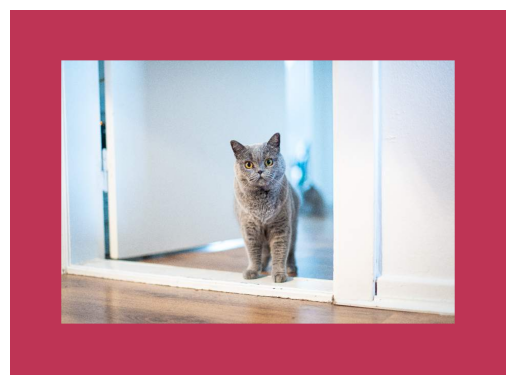

In [19]:
# add padding

img = Image.open(im_cat)

right = 100
left = 100
top = 100
bottom = 100

width, height = img.size
new_width = width + right + left
new_height = height + top + bottom

# RGB (190, 52, 85) is the Viva Magent Pantone Color of the Year 2023 https://www.pantone.com/color-of-the-year/2023 
res = Image.new(img.mode, (new_width, new_height), (190, 52, 85))

# paste the existing image to the left top corner
res.paste(img, (left, top))
#res.save('image_padded.jpg')
  
plt.imshow(res)
plt.axis('off')

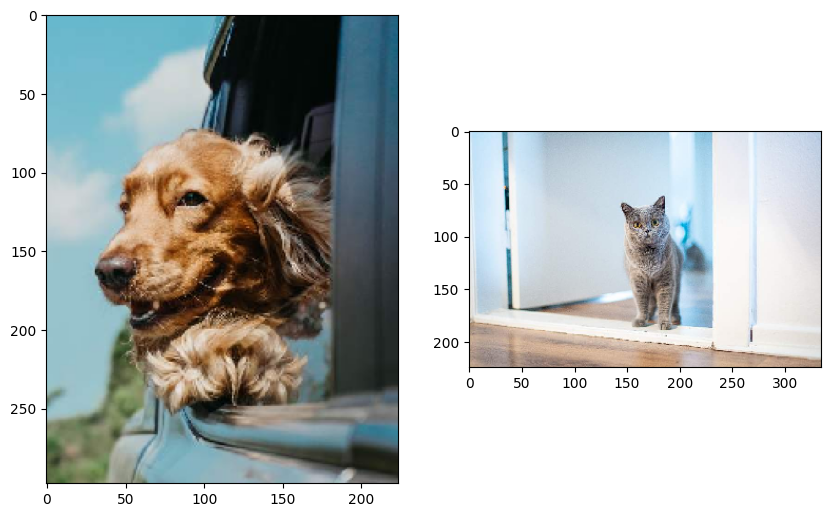

In [20]:
# resize with the shortest edge

def resize(im, fixed_size=224):
    w, h = im.size
    if w <= h:  # fixed width to 224
        width_percent = (fixed_size / w)
        height_size = int(h * width_percent)
        im = im.resize((fixed_size, height_size), Image.NEAREST)
    else:  # fixed height to 224
        height_percent = (fixed_size / h)
        width_size = int((w * height_percent))
        im = im.resize((width_size, fixed_size), Image.NEAREST)
    return im

img_dog = Image.open(im_dog)
img_cat = Image.open(im_cat)

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(resize(img_dog))
ax[1].imshow(resize(img_cat))

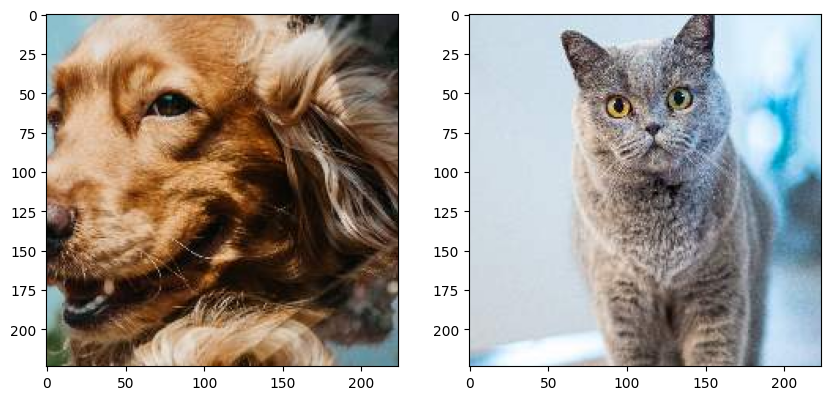

In [21]:
# center crop an image assuming the image is larger than 224 x 224

def center_crop(img, w_crop=224, h_crop=224):

    w, h = img.size  
    # int() handles size with odd number 
    # coordinates for the left upper and lower right corner points
    left = int(w/2 - w_crop/2)
    upper = int(h/2 - h_crop/2)
    right = left + w_crop
    lower = upper + h_crop

    img_cropped = img.crop((left, upper, right, lower))
    return img_cropped

img_dog = Image.open(im_dog)
img_cat = Image.open(im_cat)

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(center_crop(img_dog))
ax[1].imshow(center_crop(img_cat))

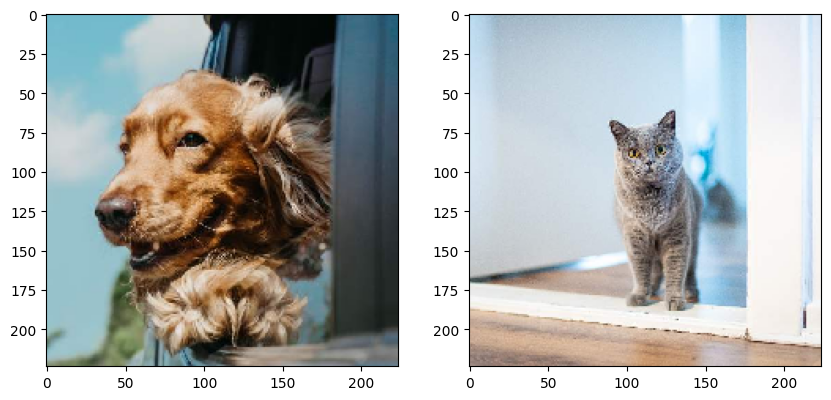

In [22]:
# resize and then center crop

img_dog = Image.open(im_dog)
img_cat = Image.open(im_cat)

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(center_crop(resize(img_dog)))
ax[1].imshow(center_crop(resize(img_cat)))

In [23]:
# compress with less quality

img = Image.open(im_cat)
img.save('output/compressed.jpg', optimize=True, quality=35)

print(f'original file size: {int(os.path.getsize(im_cat)/1000)} KB')
print(f'compressed file size: {int(os.path.getsize("output/compressed.jpg")/1000)} KB')

original file size: 28 KB
compressed file size: 17 KB


In [24]:
# resize, crop, compress without saving the file to disk
from io import BytesIO
img_file = BytesIO()

img = Image.open(im_cat) 
img = center_crop(resize(img_cat))  # resize and crop
img.save(img_file, 'jpeg', optimize=True, quality=35)  # compress
print(f'file size after resizing, cropping, and compression is {int(img_file.tell()/1000)} KB')

file size after resizing, cropping, and compression is 3 KB


(-0.5, 766.5, 511.5, -0.5)

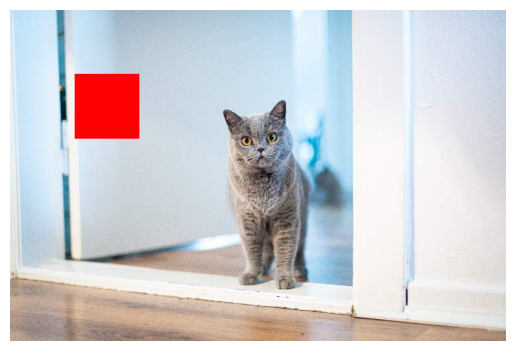

In [25]:
# change pixel info
img = Image.open(im_cat)

for i in range(100, 200):
    for j in range(100, 200):
        img.putpixel((i, j), (255, 0, 0))

plt.imshow(img)
plt.axis('off')

By default, CLIP resize the shortest edge of the image to 224 and does a center crop of 224 x 224. See https://github.com/openai/CLIP/blob/3702849800aa56e2223035bccd1c6ef91c704ca8/clip/clip.py#L79-L86
```
def _transform(n_px):
    return Compose([
        Resize(n_px, interpolation=BICUBIC),
        CenterCrop(n_px),
        _convert_image_to_rgb,
        ToTensor(),
        Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
    ])
```

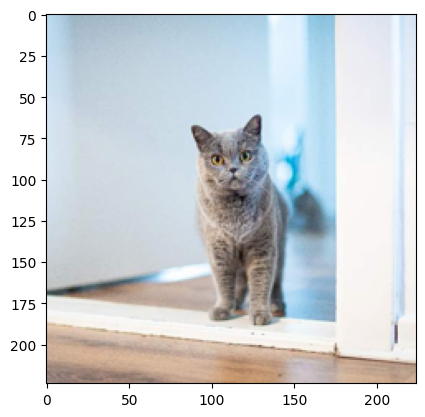

In [26]:
# the following code "de-process" the image
import clip
import torch
import urllib.request
from PIL import Image

# download the image to output folder
urllib.request.urlretrieve(
  'https://user-images.githubusercontent.com/595772/213951102-3501cb35-b4bd-46c5-92bd-bb665b639fbf.jpg',
   "output/cat.jpg")
img = Image.open("output/cat.jpg")

model, preprocess = clip.load("ViT-B/32")
image = preprocess(img)  # torch.Size([3, 224, 224])
image = image.numpy()  # tensor to numpy
image = image.transpose(1, 2, 0)  # (3, 224, 224) -> (224, 224, 3)
image = image * np.array([0.26862954, 0.26130258, 0.27577711]) + np.array([0.48145466, 0.4578275, 0.40821073])  # De-normalize
# Given an interval, values outside the interval are clipped to the interval edges. For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, and values larger than 1 become 1
image = image.clip(0,1)
plt.imshow(image)